# EDA (Exploratory Data Analysis)

Below is the **Exploratory Data Anaysis (EDA)**, which brings some overall information of the Olist Dataset, including:
- Overall of Location, Categories, Delivery Status, Payment and Score.
- Overall and Further Analysis of Orders
- Overall and Further Analysis of Delivery Process.

In [5]:
#Input Python Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Input CSV
seller = pd.read_csv('olist_sellers_dataset.csv')
customer = pd.read_csv('olist_customers_dataset.csv')
review = pd.read_csv('olist_order_reviews_dataset.csv')
df_order = pd.read_csv('df_order.csv')

## 1. Overall of Locations, Categories, Delivery Status, Payment and Score

Text(0.5, 1.0, 'Revenue, by states')

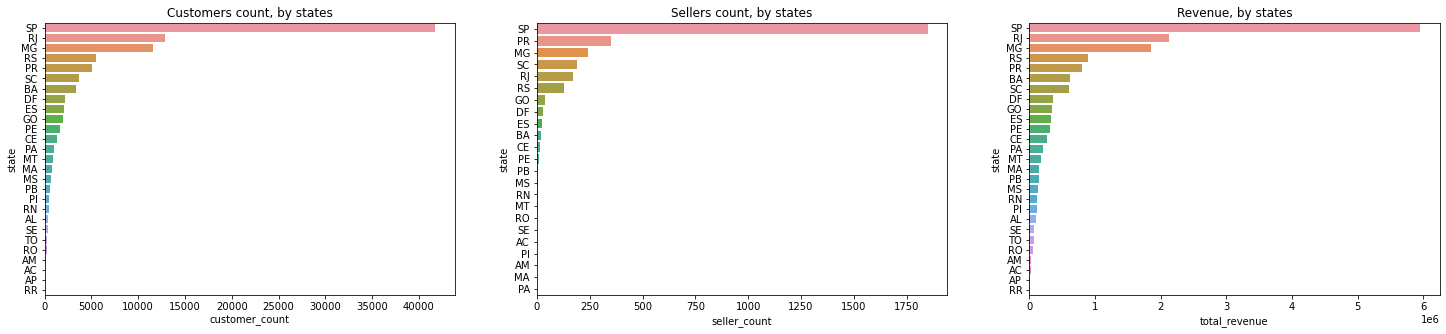

In [353]:
#By Location/State
customer_state = customer.groupby('c_state')['c_uid'].count().sort_values(ascending=False).reset_index()
customer_state.columns = ['state','customer_count']

seller_state = seller.groupby('s_state')['s_id'].count().sort_values(ascending=False).reset_index()
seller_state.columns = ['state','seller_count']

revenue_state = df_order.groupby('c_state')['revenue'].sum().sort_values(ascending=False).reset_index()
revenue_state.columns = ['state','total_revenue']

plt.figure(figsize=(25,5))

plt.subplot(1,3,1)
sns.barplot(data=customer_state, x='customer_count',y='state')
plt.title('Customers count, by states')

plt.subplot(1,3,2)
sns.barplot(data=seller_state, x='seller_count',y='state')
plt.title('Sellers count, by states')

plt.subplot(1,3,3)
sns.barplot(data=revenue_state, x='total_revenue',y='state')
plt.title('Revenue, by states')

**By Location**:
- In general, **SP** was the state wtih an outstanding number of sellers, customers, and revenue compared to other states, therefore, was the crucial area of Olist Performance.
- Other states with potential growth of e-commerce activities in terms of number of sellers/customers/revenue: **RJ, MG, RS, PR, SC**.

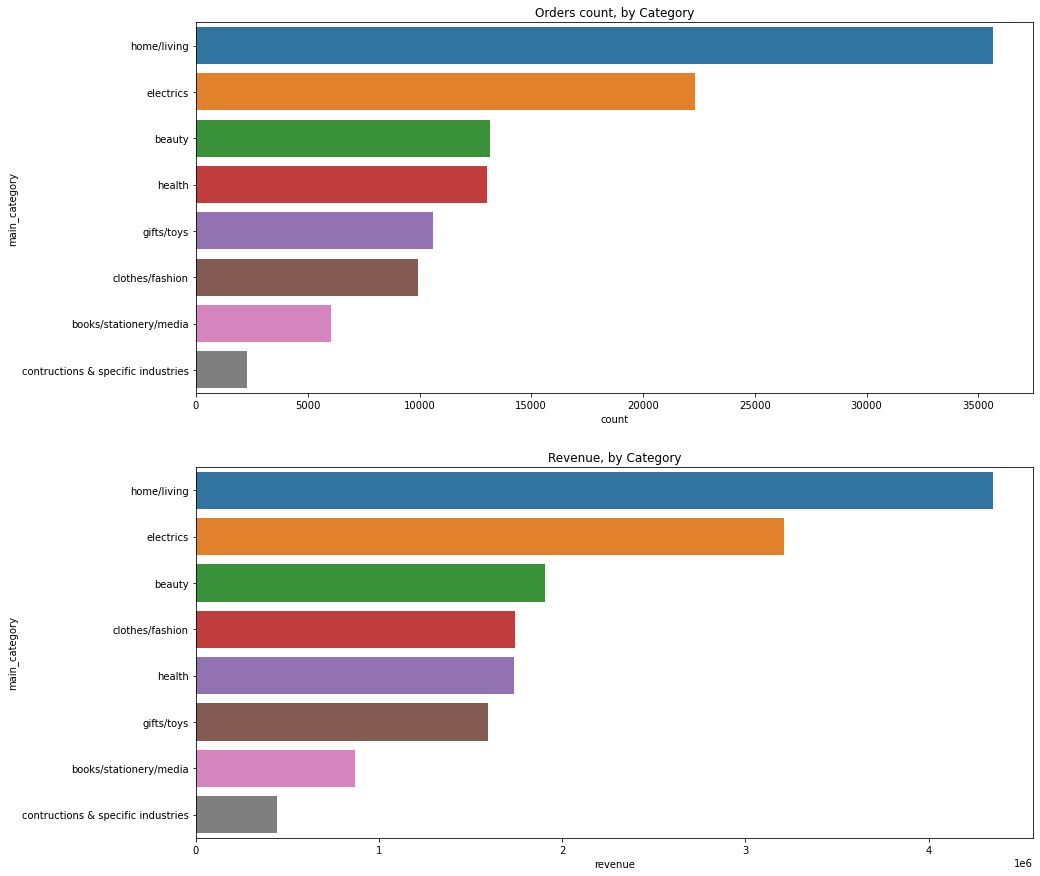

In [88]:
#By Category
category_amt = df_order.groupby('main_category')['o_id'].count().sort_values(ascending=False).reset_index()
category_rev = df_order.groupby('main_category')['revenue'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15,15))

plt.subplot(211)
sns.barplot(data=category_amt,x='o_id',y='main_category')
plt.xlabel('count')
plt.title('Orders count, by Category')

plt.subplot(212)
sns.barplot(data=category_rev,x='revenue',y='main_category')
plt.xlabel('revenue')
plt.title('Revenue, by Category')

plt.show()

**By Category**:
- **Home/Living** and **Electrics** were the most popular categories on Olist E-commerce Platform.

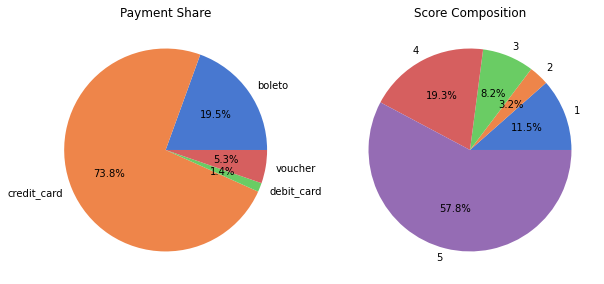

In [355]:
#By Payment and By Score
payment_order = df_order.groupby('type')['o_id'].count().reset_index()
score_order = review.groupby('score')['r_id'].count().reset_index()

color_chosen = sns.color_palette('muted')

plt.figure(figsize = (10,8))
plt.subplot(121)
plt.pie(payment_order['o_id'], labels=payment_order['type'], colors= color_chosen ,autopct='%1.1f%%')
plt.title('Payment Share')

plt.subplot(122)
plt.pie(score_order['r_id'], labels=score_order['score'], colors= color_chosen ,autopct='%1.1f%%')
plt.title('Score Composition')

plt.show()

**By Payment method and Score Composition**:
- **Credit cards** were the most popular payment method on Olist E-commerce platform, followed by **Boreto** (a term for cash payment. Approximately 75% of Customers preferred to pay via credit card.
- 57.8% of transitions via Olist were scored 5. The score of 4 and 1 accounted for 19.3% and 11.5% respectively.
                                                                                                      

## 2. Overall and further analysis of Orders

### 2.1 Number of orders and revenue over the period

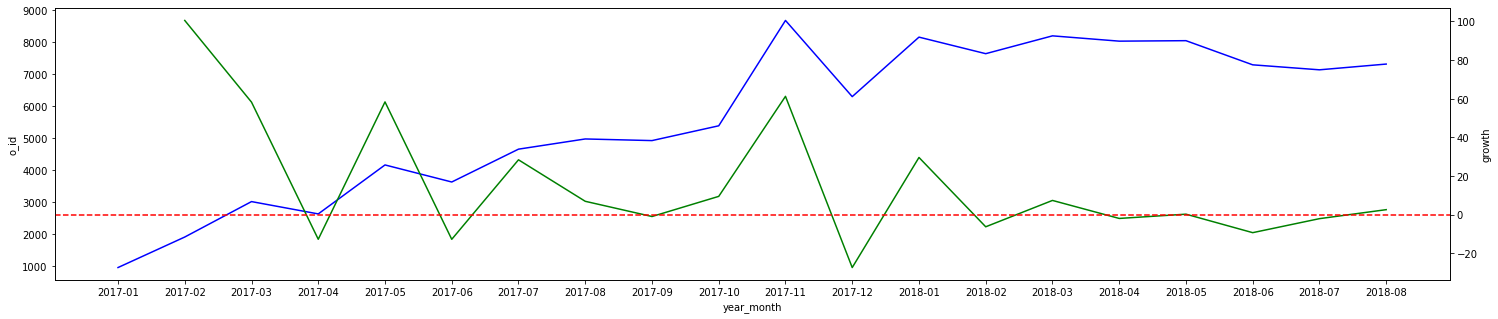

In [359]:
#Number of Order over the period
ord_period = df_order.groupby('year_month')['o_id'].count().reset_index()
ord_period['year_month'] = ord_period['year_month'].astype('string')
ord_period['growth'] = ord_period['o_id'].pct_change()*100

plt.figure(figsize=(25,5))
sns.lineplot(data=ord_period, x='year_month', y='o_id', color='blue')
plt.twinx()
sns.lineplot(data=ord_period, x='year_month', y='growth', color='green')
plt.axhline(y=0, color='red', linestyle='--')

plt.show()

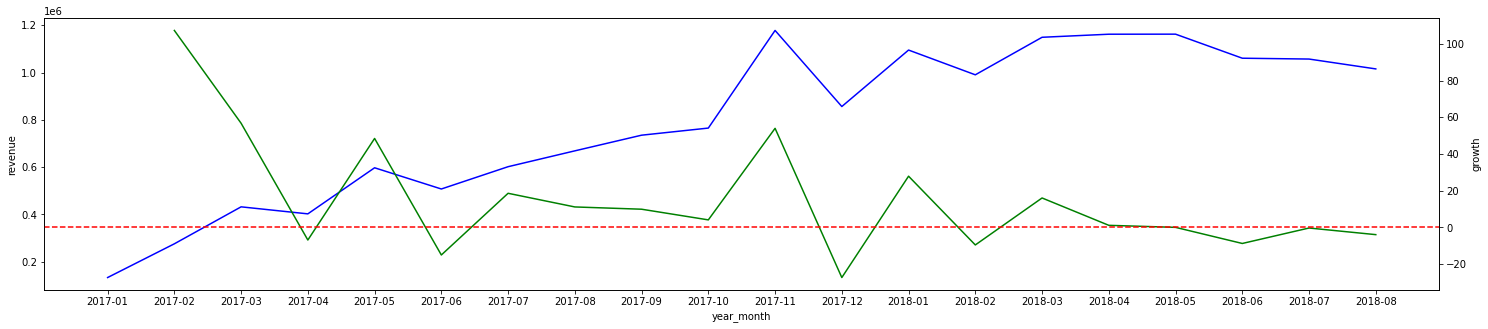

In [360]:
#Revenue over the period
rev_period = df_order.groupby('year_month')['revenue'].sum().reset_index()
rev_period['year_month'] = rev_period['year_month'].astype('string')
rev_period['growth'] = rev_period['revenue'].pct_change()*100

plt.figure(figsize=(25,5))
sns.lineplot(data=rev_period, x='year_month', y='revenue', color='blue')
plt.twinx()
sns.lineplot(data=rev_period, x='year_month', y='growth', color='green')
plt.axhline(y=0, color='red', linestyle='--')

plt.show()

By **Number of Orders** and **Revenue**:
- Reached 'Peak' in Nov 2017 and Jan 2018.
- Quantity and Revenue were suffering negative growths in 2018, from April 2018.

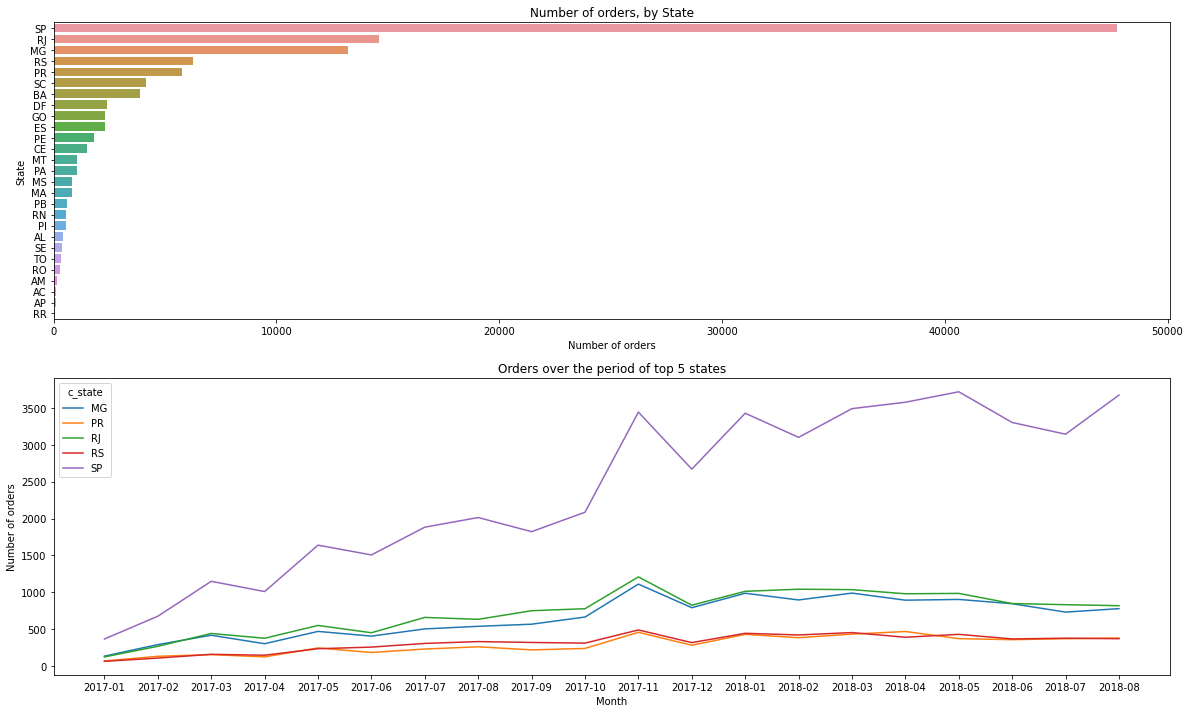

In [363]:
#Number of orders of all the states, over the period
state_order = df_order.groupby(['c_state'])['o_id'].count().sort_values(ascending = False).reset_index()

#Number of orders of Top 5 states in terms of Order Quantity, over the period
top_state_order = df_order[df_order['c_state'].isin(['SP','RJ','MG','RS','PR'])].groupby(['year_month','c_state'])['o_id'].count().reset_index()
top_state_order['year_month'] = top_state_order['year_month'].astype('str')

plt.figure(figsize=(20,12))

plt.subplot(211)
sns.barplot(data=state_order, x='o_id', y='c_state')
plt.xlabel('Number of orders')
plt.ylabel('State')
plt.title('Number of orders, by State')    

plt.subplot(212)
sns.lineplot(data=top_state_order, x='year_month', y='o_id', hue='c_state')
plt.xlabel('Month')
plt.ylabel('Number of orders')
plt.title('Orders over the period of top 5 states')  

plt.show()

Top 5 States in terms of Order Quantity: SP, RJ, MG, RS, PR:
- In general, the order quantity of these states **tended to increase** over the period. 
- **SP was the highest-order-quantity state**, with an outstanding performance compared to the other 4 states.

### 2.2 Monthly Retention Rate

The following steps are used to extract information of customers who created orders in two consecutive months:
- Summarize information of orders, by **Year-Month** of `Purchase` (`c_uid` and `revenue` information are used)
- Create a new 'retention' table to count appearances of a certain customer, by **Year-Month**
- Summarize 'retention' information into a new table to count if a customer buys on Olist in 2 consecutive months. The Customer Retention Rate can be calculated from this table.

In [108]:
#Summarize customer and revenue information, by Year-month
customer_purchase = df_order[df_order['status']=='delivered'].groupby(['c_uid','year_month'])['revenue'].sum().reset_index()
customer_purchase

,c_uid,year_month,revenue
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,27.19
2,0000f46a3911fa3c0805444483337064,2017-03,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11,196.89
...,...,...,...
93596,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,2067.42
93597,fffea47cd6d3cc0a88bd621562a9d061,2017-12,84.58
93598,ffff371b4d645b6ecea244b27531430a,2017-02,112.46
93599,ffff5962728ec6157033ef9805bacc48,2018-05,133.69


In [110]:
#Create a new 'retention' table to count appearances of a certain customer, by month
retention = pd.pivot_table(
    data=customer_purchase,
    index="c_uid",
    columns="year_month",
    values="revenue",
    aggfunc=len,
    fill_value=0,
)
retention = retention.T
retention

c_uid,0000366f3b9a7992bf8c76cfdf3221e2,0000b849f77a49e4a4ce2b2a4ca5be3f,0000f46a3911fa3c0805444483337064,0000f6ccb0745a6a4b88665a16c9f078,0004aac84e0df4da2b147fca70cf8255,0004bd2a26a76fe21f786e4fbd80607f,00050ab1314c0e55a6ca13cf7181fecf,00053a61a98854899e70ed204dd4bafe,0005e1862207bf6ccc02e4228effd9a0,0005ef4cd20d2893f0d9fbd94d3c0d97,...,fff699c184bcc967d62fa2c6171765f7,fff7219c86179ca6441b8f37823ba3d3,fff96bc586f78b1f070da28c4977e810,fffa431dd3fcdefea4b1777d114144f2,fffb09418989a0dbff854a28163e47c6,fffcf5a5ff07b0908bd4e2dbc735a684,fffea47cd6d3cc0a88bd621562a9d061,ffff371b4d645b6ecea244b27531430a,ffff5962728ec6157033ef9805bacc48,ffffd2657e2aad2907e67c3e9daecbeb
year_month,,,,,,,,,,,,,,,,,,,,,
2017-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2017-03,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2017-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2017-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2017-07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-09,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [112]:
#Summarize 'retention' table to count if a customer buys on Olist in 2 continuous months
month = retention.index
retention_array = []
for i in range (1,retention.shape[0]):
    retention_data = {}
    retention_data['YearMonth'] = month[i]
    retention_data['RetainCustomer'] = ((retention.iloc[i] + retention.iloc[i - 1]) == 2).sum()
    retention_data["TotalCount"] = retention.iloc[i].sum()
    retention_array.append(retention_data)

retention_count = pd.DataFrame(retention_array)

In [113]:
#Calculate Retention Rate
retention_count['RetentionRate'] = retention_count['RetainCustomer']/retention_count['TotalCount']
retention_count

,YearMonth,RetainCustomer,TotalCount,RetentionRate
0,2017-02,2,1583,0.001263
1,2017-03,3,2461,0.001219
2,2017-04,11,2213,0.004971
3,2017-05,14,3400,0.004118
4,2017-06,16,3025,0.005289
5,2017-07,16,3756,0.004260
6,2017-08,22,4053,0.005428
7,2017-09,30,4025,0.007453
8,2017-10,31,4367,0.007099
9,2017-11,35,7082,0.004942


In [116]:
#Counting the number of customer with more than 10 orders over the period
customer_count = df_order.groupby('c_uid')['c_uid'].count().sort_values(ascending=False).reset_index(name='count')
customer_count[customer_count['count']>=10]

,c_uid,count
0,9a736b248f67d166d2fbb006bcb877c3,75
1,6fbc7cdadbb522125f4b27ae9dee4060,38
2,f9ae226291893fda10af7965268fb7f6,35
3,569aa12b73b5f7edeaa6f2a01603e381,26
4,db1af3fd6b23ac3873ef02619d548f9c,24
...,...,...
91,3d47f4368ccc8e1bb4c4a12dbda7111b,10
92,1dedbe50138a3540d30fe355776d2d6a,10
93,09e9991c50513a303a2da26619870d7f,10
94,89be58cbdd6ef318e3ed93fdb22be178,10


In [118]:
customer_count['c_uid'].nunique()

91817

- Olist's Customer Retention Rate over the period was **very low**. **None of these months** had a Retention Rate of **more than 1%** (The widely accepted customer retention rate for the e-commerce industry is 31%, according to Omniconvert).
- With 91817 different `c_uid`s from Jan 2017 to Aug 2018, only 96 `c_uid`s purchased 10 times on Olist (0.1%).

### 2.3. Price, by Category

In [127]:
price_category = df_order[['price','main_category']]
price_category_summary = price_category.groupby('main_category')['price'].agg(['sum','count','mean']).sort_values('mean',ascending=False).reset_index()
price_category_summary

,main_category,sum,count,mean
0,contructions & specific industries,386615.15,2288,168.975153
1,clothes/fashion,1566054.24,9928,157.741160
2,gifts/toys,1378102.40,10604,129.960619
3,beauty,1666258.33,13163,126.586518
4,books/stationery/media,754740.95,6056,124.626973
5,electrics,2774671.89,22316,124.335539
6,health,1478396.26,13027,113.487085
7,home/living,3576809.91,35663,100.294701


**Constructions & Specific industries** is the product with the highest price.
**Electrics** and **Home/living** are the categories with the cheapest price per unit.

<AxesSubplot:xlabel='price', ylabel='main_category'>

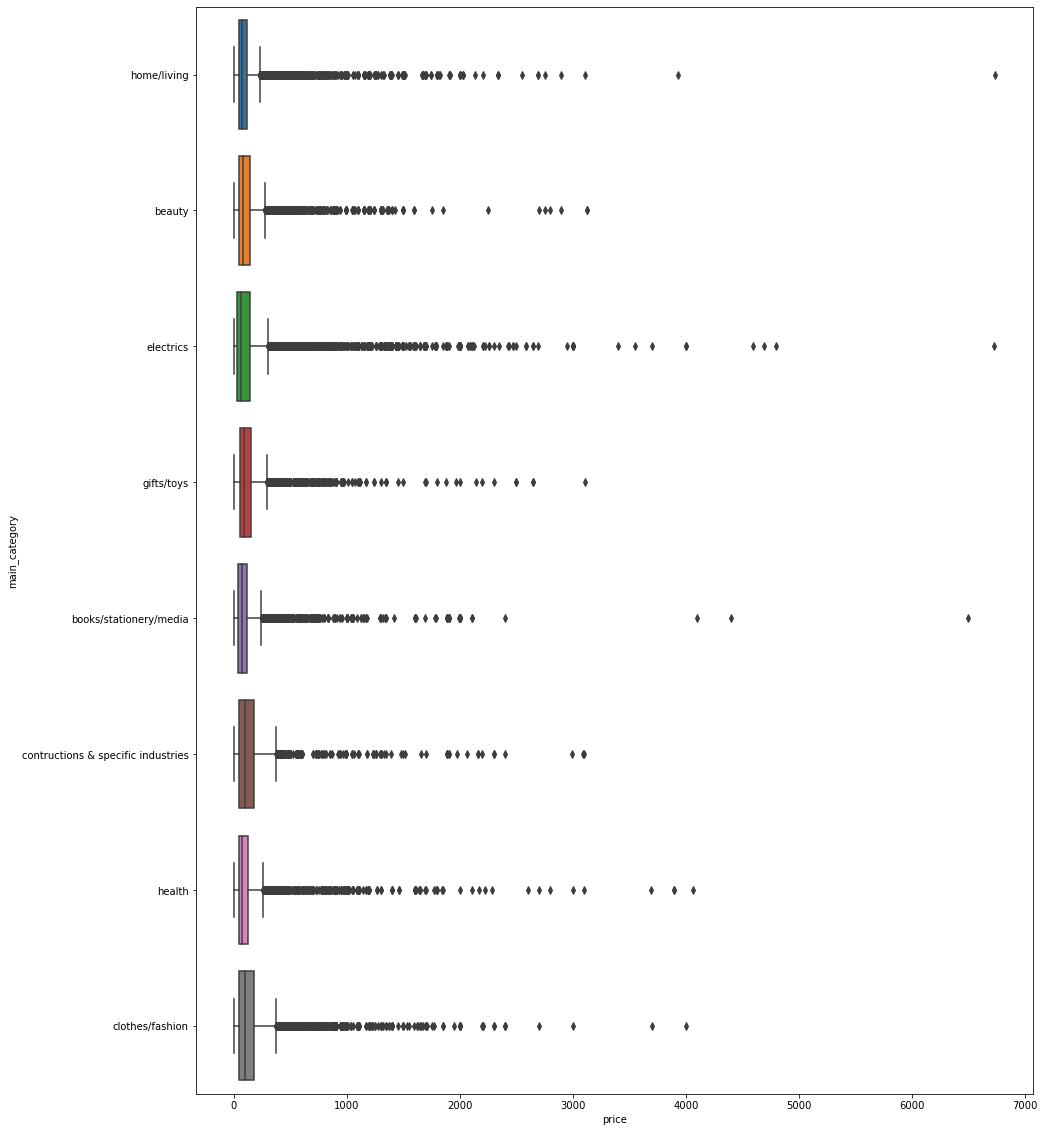

In [375]:
plt.figure(figsize=(15,20))
sns.boxplot(data=price_category,x='price',y='main_category')

### 2.4 Average Order Value (AOV) Index

In [377]:
AvgOrderValue = df_order.groupby('year_month')[['o_id','freight','revenue']].agg({'o_id':'count','freight':'sum','revenue':'sum'})
AvgOrderValue['AvgValue'] = AvgOrderValue['revenue']/AvgOrderValue['o_id']
AvgOrderValue['AvgFreight'] = AvgOrderValue['freight']/AvgOrderValue['o_id']
AvgOrderValue.columns = ['Orders count','Freight','Revenue','AvgValue','AvgFreight']

AvgOrderValue['Freight%'] = AvgOrderValue['AvgFreight']/AvgOrderValue['AvgValue']*100
AvgOrderValue 

,Orders count,Freight,Revenue,AvgValue,AvgFreight,Freight%
year_month,,,,,,
2017-01,950,16403.85,132989.69,139.989147,17.267211,12.334678
2017-02,1905,38295.91,275654.84,144.700703,20.102840,13.892704
2017-03,3014,57701.98,432021.42,143.338228,19.144652,13.356278
2017-04,2628,51088.32,402322.11,153.090605,19.440000,12.698363
2017-05,4161,80292.46,597233.51,143.531245,19.296434,13.444065
2017-06,3627,70722.96,507508.75,139.925214,19.499024,13.935318
2017-07,4655,90191.07,601794.89,129.279246,19.375096,14.987012
2017-08,4974,94677.82,668827.46,134.464708,19.034544,14.155791
2017-09,4923,97909.04,735075.49,149.314542,19.888085,13.319590


All of the indexes above (AOV, Avg Freight, and Ratio of Freight) did not fluctuate sharply over the period. **AOV** maintained its figures between **129 and 145 reals**, **Avg Freight** was from **17 to 22 reals** on average each month, accounting for **12-15% revenue** of an order.

## 3. Overall and further analysis of Delivery Process

### 3.1. Delivery Days and Freight, by States

In [381]:
#Mean of Working Estimate Delivery Days
print (df_order['est_dlv'].mean())
print (df_order['act_dlv'].mean())
print (df_order['freight'].mean())

22.859224460546223
11.535835301819855
20.025839532931574


Meaning:
- Avg days **estimated** from the day **approved** to the day **delivered**: ~23 days
- Avg days **actual** from the day **approved** to the day **delivered**: ~11 days
- Avg days from the day **estimate** to the day **actual elivered**: -11 days (which means the orders are often delivered **11 days sooner** than the est day)
- Avg Freight: **20 Brazil Reals**

In [383]:
#Check Avg Estimate Delivery days, by Customer States
act_app = df_order.groupby('c_state')['act_dlv'].mean().sort_values().reset_index()
est_app = df_order.groupby('c_state')['est_dlv'].mean().sort_values().reset_index()
act_est = df_order.groupby('c_state')['act_est'].mean().sort_values().reset_index()

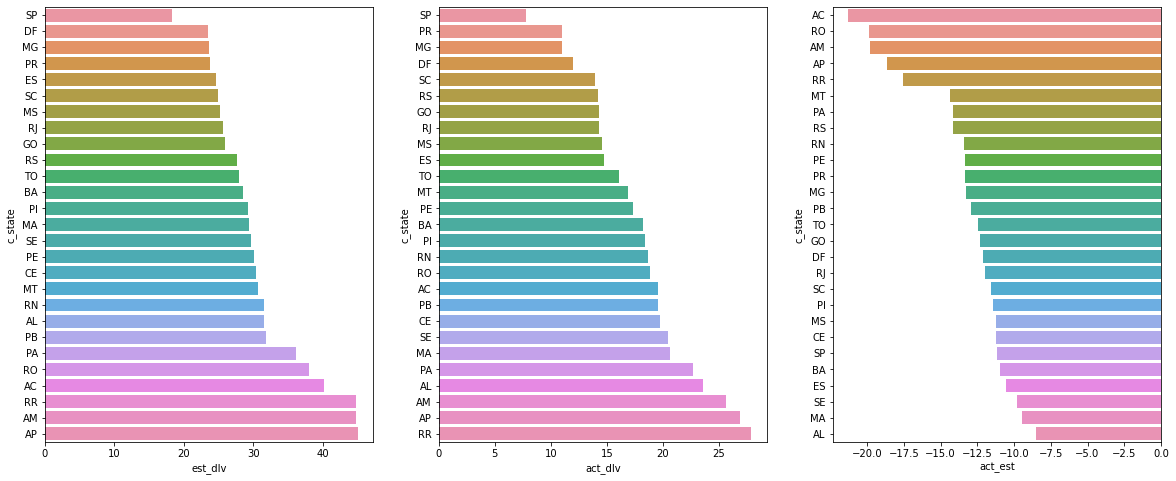

In [384]:
plt.figure(figsize=(20,8))

plt.subplot(131)
sns.barplot(data=est_app,x='est_dlv',y='c_state')

plt.subplot(132)
sns.barplot(data=act_app,x='act_dlv',y='c_state')

plt.subplot(133)
sns.barplot(data=act_est,x='act_est',y='c_state')

plt.show()

**SP** was also the state with **good performance** thanks to **low figures of est_dlv and act_dlv**. However, **not all other four** of top 5 State had a low index of average est_dlv and act_dlv.

### 3.2. Delivery Days and Freight, by Category

In [387]:
#Delivery
category_dl = df_order[['o_id','main_category','est_dlv','act_dlv','act_est']]
category_dl.drop_duplicates(inplace=True)
category_avg_dl = category_dl.groupby('main_category')[['est_dlv','act_dlv','act_est']].mean().reset_index()
category_avg_dl

,main_category,est_dlv,act_dlv,act_est
0,beauty,22.379792,11.084484,-11.952312
1,books/stationery/media,22.751938,11.713732,-11.699336
2,clothes/fashion,22.996154,11.439253,-12.207127
3,contructions & specific industries,21.129721,10.084291,-11.733042
4,electrics,22.906879,11.806512,-11.776978
5,gifts/toys,22.612484,11.053232,-12.216767
6,health,22.206344,11.274741,-11.598282
7,home/living,23.209119,12.137774,-11.720533


In [388]:
#Freight
category_freight = df_order[['o_id','main_category','freight']]
category_freight.drop_duplicates(inplace=True)
category_avg_freight = category_freight.groupby('main_category')['freight'].mean().reset_index().sort_values('freight')
category_avg_freight

/tmp/ipykernel_130/1703251035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_freight.drop_duplicates(inplace=True)


,main_category,freight
2,clothes/fashion,17.860695
0,beauty,18.379355
1,books/stationery/media,18.946831
4,electrics,19.345925
6,health,19.961237
5,gifts/toys,20.394998
7,home/living,22.120201
3,contructions & specific industries,24.151639


- **Delivery**: The **average actual delivery days didn't vary much** among different categories, which **partly showed a weak relationship between Freight value and Number of Delivery days**.
- **Freight**: The average freight by Category varied from **17 to 24 Brazilian Reals**, with **Construcstions** is the **highest-average-freight category**.


### 3.3. Delivery Days and Freight, by Size and Weight

In [391]:
size_weight_dl = df_order[['o_id','p_id','size','weight','est_dlv','act_dlv','act_est','freight']]
size_weight_dl.drop_duplicates(inplace=True)
size_weight_dl.drop(columns=['o_id','p_id'],inplace=True)
size_weight_dl
size_weight_dl.corr().style.background_gradient(cmap="Blues")

,size,weight,est_dlv,act_dlv,act_est,freight
size,1.000000,0.801827,0.063691,0.071531,0.013224,0.585275
weight,0.801827,1.000000,0.073836,0.080244,0.012591,0.611696
est_dlv,0.063691,0.073836,1.000000,0.379063,-0.498000,0.280226
act_dlv,0.071531,0.080244,0.379063,1.000000,0.612516,0.210754
act_est,0.013224,0.012591,-0.498000,0.612516,1.000000,-0.041823
freight,0.585275,0.611696,0.280226,0.210754,-0.041823,1.000000


- There was a relatively **strong trend** from **size/weight** to **freight** of an order.
- There were no clear connection between **size/weight** of an order and its **delivery days**.